link: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing 

### Attribute Information:

Input variables:
#### bank client data:
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')

#### related with the last contact of the current campaign:
8. contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### other attributes:
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

#### social and economic context attributes
16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)

#### Output variable (desired target):
21. y - has the client subscribed a term deposit? (binary: 'yes','no')

In [23]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#pd.set_option('display.max_colwidth', -1)

In [2]:
sns.__version__

'0.11.0'

In [24]:
# load dataset
dataset = pd.read_csv('data/bank/bank.csv', sep=';')
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


no     4000
yes     521
Name: y, dtype: int64

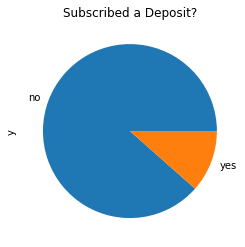

In [64]:
dataset['y'].value_counts().plot.pie(title='Subscribed a Deposit?')
dataset['y'].value_counts()

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [6]:
dataset.nunique()

age            67
job            12
marital         3
education       4
default         2
balance      2353
housing         2
loan            2
contact         3
day            31
month          12
duration      875
campaign       32
pdays         292
previous       24
poutcome        4
y               2
dtype: int64

In [7]:
# 9 columns with object type
obj_df = dataset.select_dtypes(include='object')
# obj_df.iloc[:5,:-1]
obj_df.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,unemployed,married,primary,no,no,no,cellular,oct,unknown,no
1,services,married,secondary,no,yes,yes,cellular,may,failure,no
2,management,single,tertiary,no,yes,no,cellular,apr,failure,no
3,management,married,tertiary,no,yes,yes,unknown,jun,unknown,no
4,blue-collar,married,secondary,no,yes,no,unknown,may,unknown,no


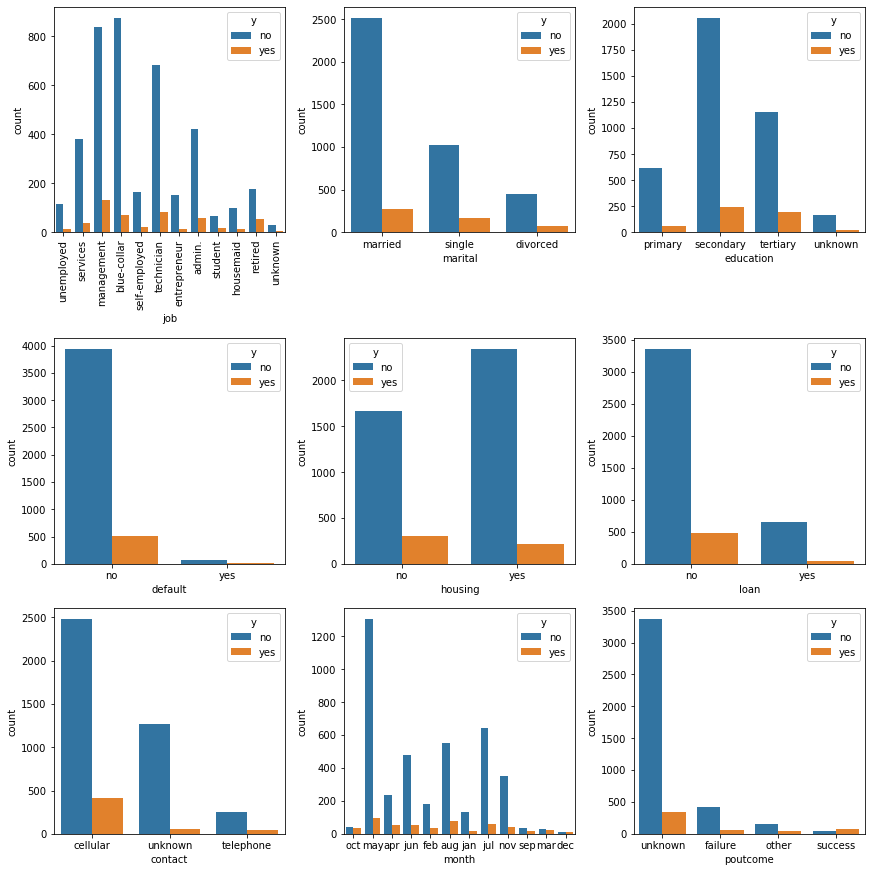

In [8]:
# columns with object type
n = 3
fig, axes = plt.subplots(n, n, figsize=(12,12), constrained_layout=True)

obj_cols = np.array(obj_df.columns[:-1])
col = 0

for i in range(n):
    for j in range(n):
        sns.countplot(ax=axes[i,j], x=obj_cols[col], hue='y', data=dataset)
        col += 1

#fig.tight_layout()
#plt.subplots_adjust()
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=90)
plt.show()

In [9]:
dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


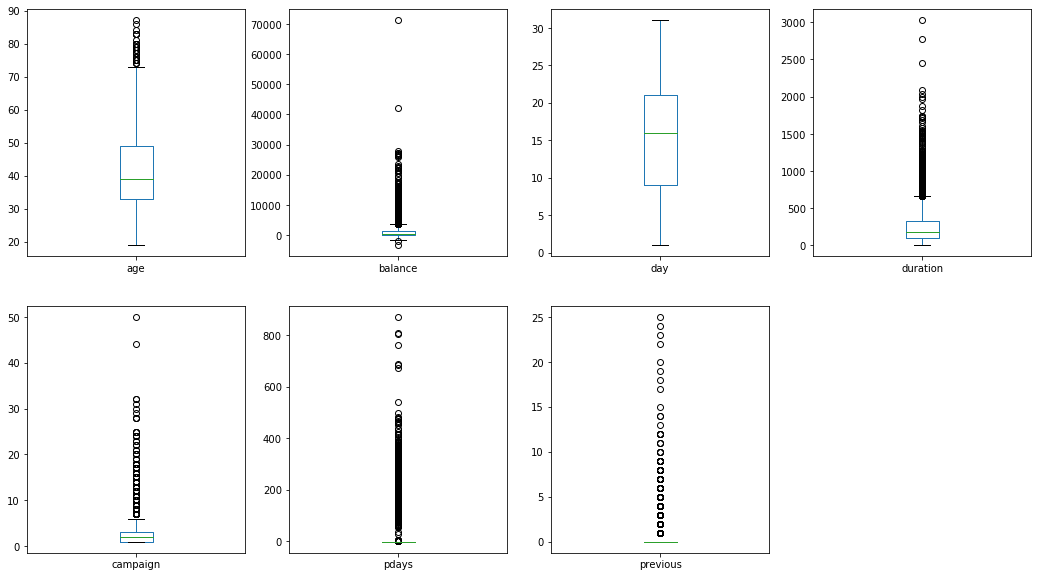

In [10]:
dataset.plot(kind='box', subplots=True, layout=(2,4), figsize=(18,10))
plt.show()

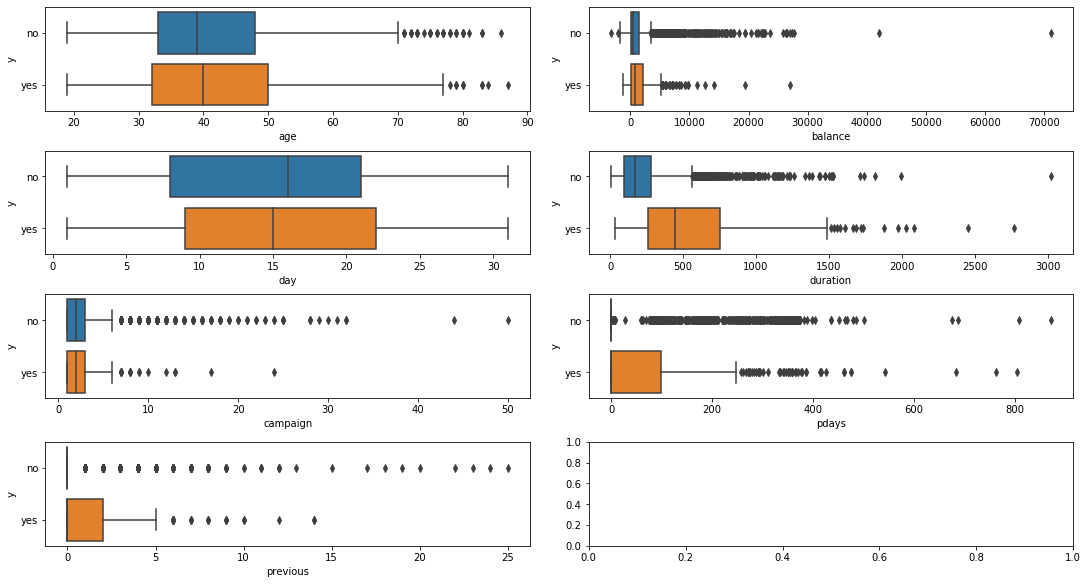

In [11]:
# 7 columns with int64 type
num_cols = np.array(dataset.select_dtypes(exclude='object').columns)

n, m = 4, 2
fig, axes = plt.subplots(n, m, figsize=(15,8), constrained_layout=True)

col = 0

for i in range(n):
    for j in range(m):
        sns.boxplot(ax=axes[i,j], x=num_cols[col], y='y', data=dataset)
        col += 1
        if col==7:
            break

plt.show()

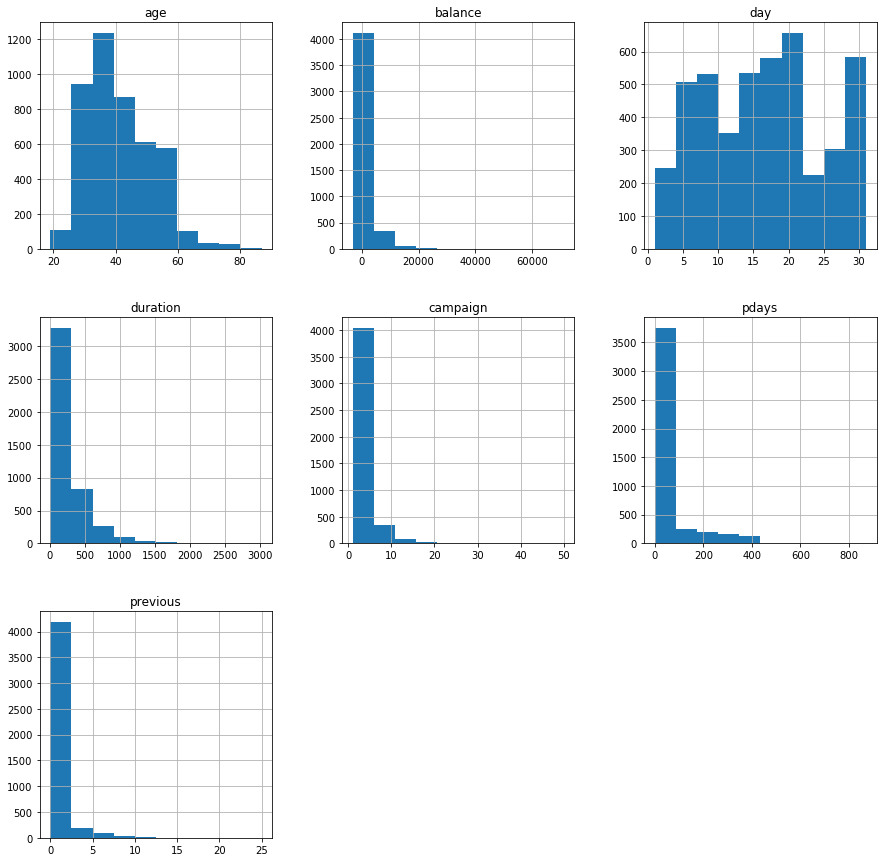

In [12]:
dataset.hist(figsize=(15,15))
plt.show()

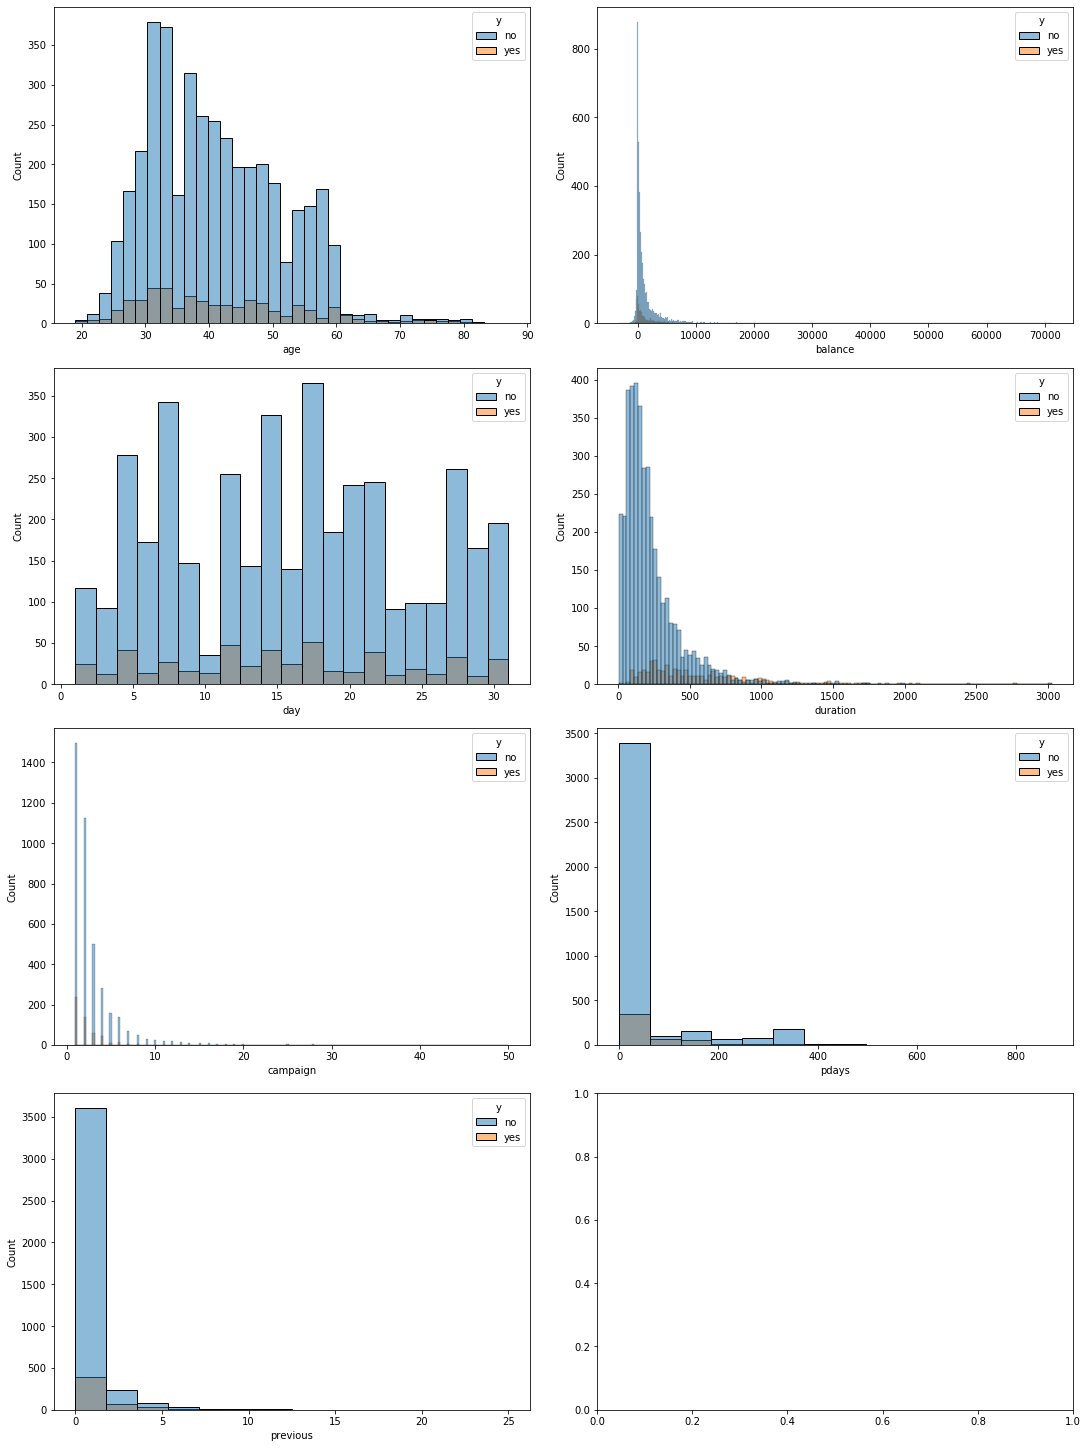

In [13]:
fig, axes = plt.subplots(n, m, figsize=(15,20), constrained_layout=True)

col = 0

for i in range(n):
    for j in range(m):
        sns.histplot(dataset, x=num_cols[col], hue='y', ax=axes[i,j], multiple='layer')
        col += 1
        if col==7:
            break
plt.show()

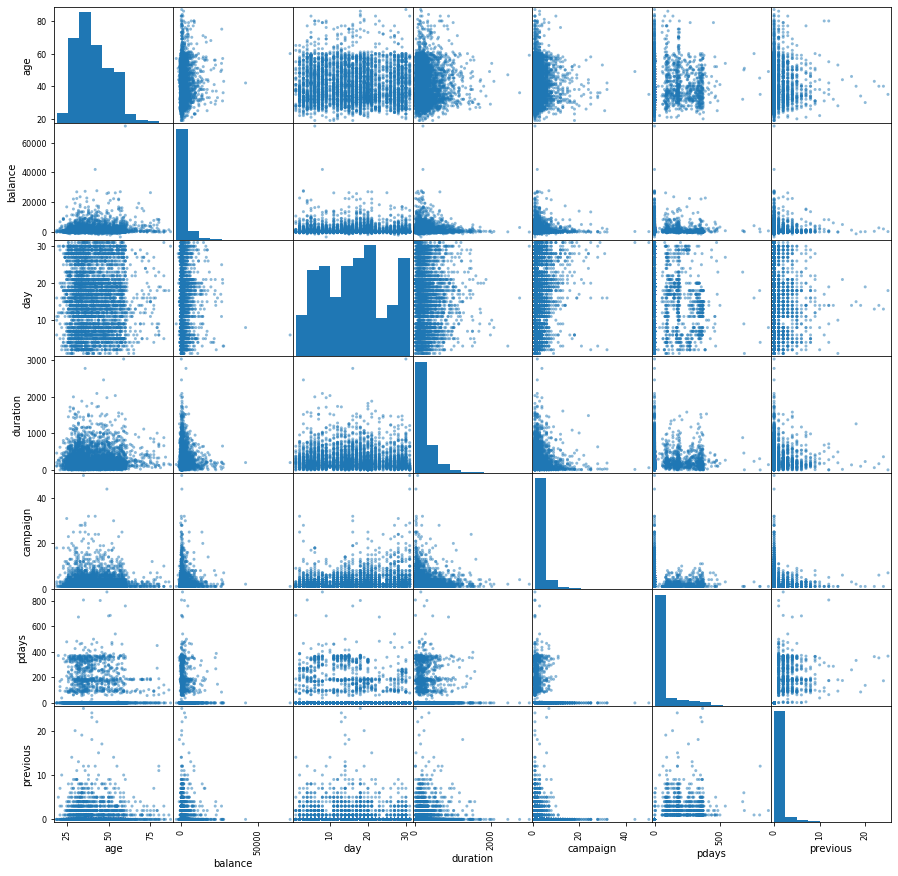

In [14]:
pd.plotting.scatter_matrix(dataset, figsize=(15,15))
plt.show()

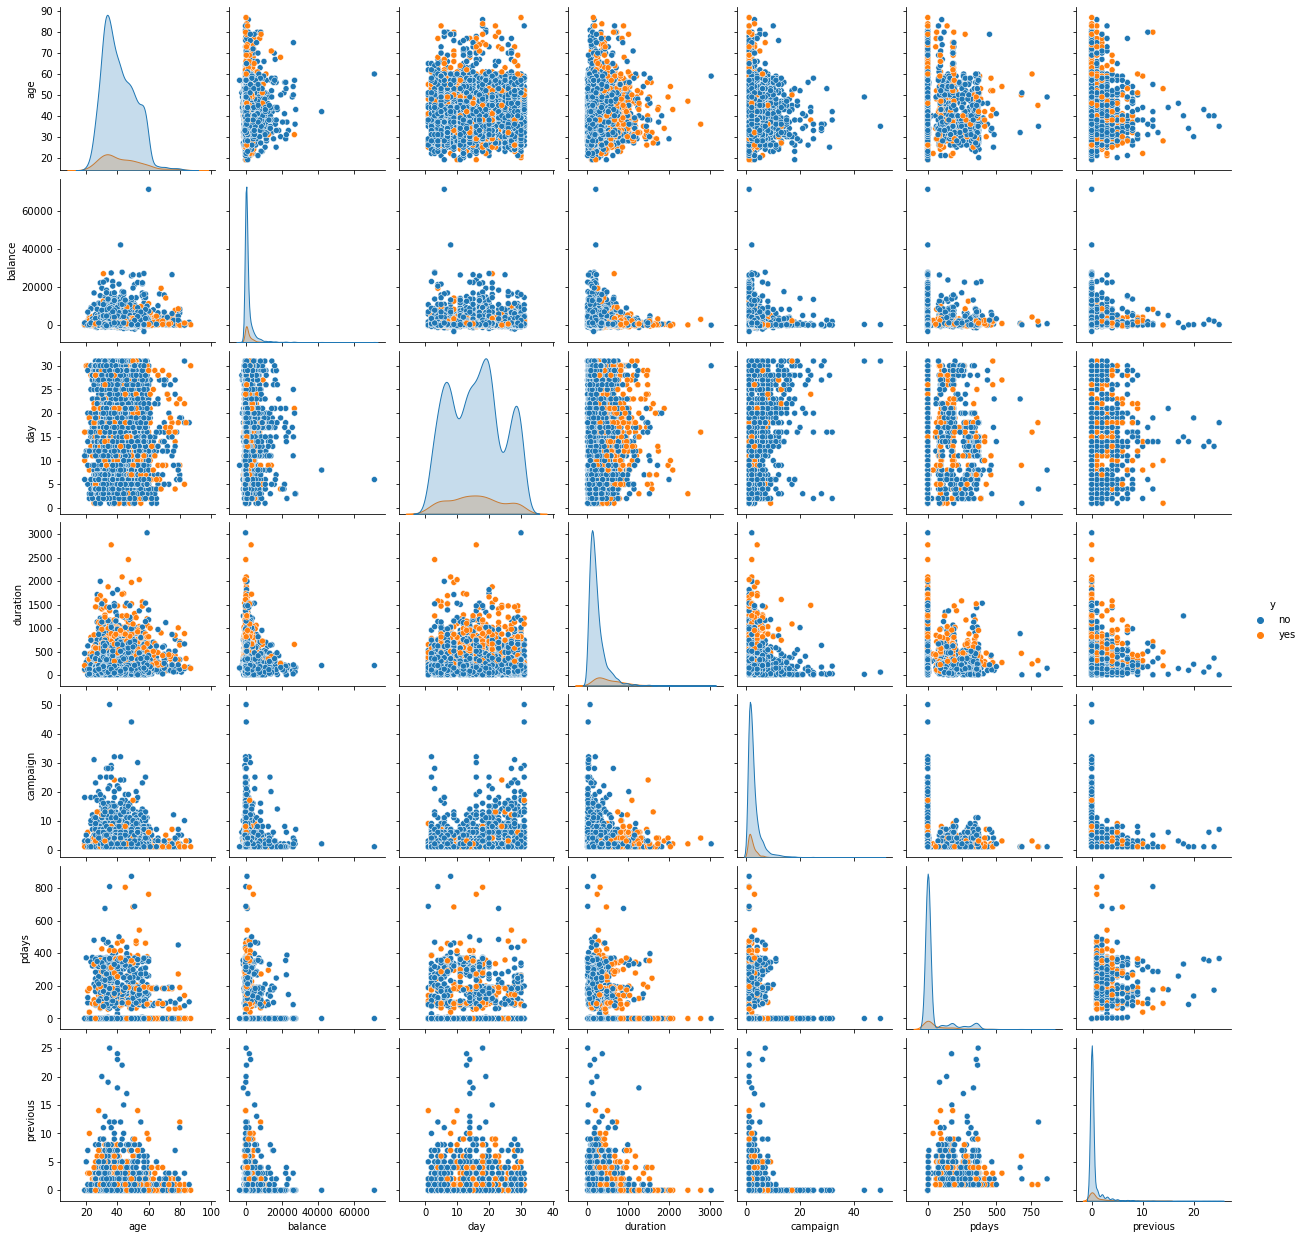

In [15]:
# pg = sns.PairGrid(dataset, hue='y')
# #pg.map(sns.scatterplot)

# pg.map_diag(sns.histplot)
# pg.map_offdiag(sns.scatterplot)

sns.pairplot(dataset, hue='y', height=2.5)
plt.show()

In [49]:
# as it is described for feature "duration", it should be removed from training model
X = dataset.drop(columns=['duration','y'], axis=1)
X.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,5,-1,0,unknown
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,1,-1,0,unknown
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,11,-1,0,unknown
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,4,211,3,other
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,2,249,7,other


In [26]:
len(data[data['pdays']==999]), len(data[data['pdays']<0])

(0, 3705)

### Feature preprocessing

In [50]:
from sklearn.preprocessing import LabelEncoder

l_encoder = LabelEncoder()
l_encoder.fit(dataset['y'])
l_encoder.classes_

array(['no', 'yes'], dtype=object)

In [52]:
Y = l_encoder.transform(dataset['y'])
Y

array([0, 0, 0, ..., 0, 0, 0])

In [57]:
from sklearn.preprocessing import OrdinalEncoder

o_encoder = OrdinalEncoder()
o_encoder.fit(X[['default']])
o_encoder.

AttributeError: 'OrdinalEncoder' object has no attribute 'classes_'

# old codes:

In [31]:
data['y'] = data['y'].map({'yes':1, 'no':0})
data['default'] = data['default'].map({'yes':1, 'no':0})
data['loan'] = data['loan'].map({'yes':1, 'no':0})
data['housing'] = data['housing'].map({'yes':1, 'no':0})
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,1,-1,0,unknown,0


In [18]:
# creating new feature from day (newm, midm, endm) 
def convert_day(d):
    '''
    for d in [:10] returns 'newm'
    for d in [10:20] returns 'midm'
    for d in [20:] returns 'endm'
    '''
    m = 'endm'
    if d<10:
        m = 'newm'
    elif d<20:
        m = 'midm'
    return(m)
    
data['day'] = data['day'].apply(lambda x: convert_day(x))
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,endm,jul,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,newm,may,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,midm,aug,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,newm,feb,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,newm,apr,2,249,7,other,no


In [19]:
data['month'].unique()

array(['oct', 'may', 'apr', 'jun', 'feb', 'aug', 'jan', 'jul', 'nov',
       'sep', 'mar', 'dec'], dtype=object)

In [20]:
# creating new feature from month (q1, q2, q3, q4)
def convert2_quartile(m):
    q1 = ['jan','feb','mar']
    q2 = ['apr', 'may', 'june']
    q3 = ['jul', 'aug', 'sep']
    q4 = ['oct', 'nov', 'dec']
    
    quartile = 'q4'
    if m in q1:
        quartile = 'q1'
    elif m in q2:
        quartile = 'q2'
    elif m in q3:
        quartile = 'q3'
    
    return(quartile)


data['month'] = data['month'].apply(lambda x: convert2_quartile(x))
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,endm,q3,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,newm,q2,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,midm,q3,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,newm,q1,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,newm,q2,2,249,7,other,no


### Build Models

In [21]:
from sklearn.model_selection import train_test_split, KFold, cross_val_predict

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


In [22]:
X = dataset.drop(columns=['y'])
Y = dataset['y']
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=.2, random_state=1)